In [1]:
set.seed(88)
## run this first!
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(tidymodels)
library(themis)
library(repr)
library(cowplot)

options(repr.matrix.max.rows=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Set seed. Install all above paackages and libraries. 

# Final Project: Predicting Heart Disease Diagnosis
### Discovery of the Relevant and Irrelevant Predictors

### Introduction
The heart disease data includes datasets from Cleveland, California, Budapest, and Zurich (Dua et al., 2019). We will focus on Cleveland because it is the most complete. Out of the 14 variables, 9 are categorical variables, variables that we can potentially predict by building a classifier (Dua et al., 2019). 

CT scans to see potential blockages in arteries as a method of preventative care are avoided by public healthcare systems (Levine, 2019, p. 3) or costly with private healthcare (Berenson et al., 2008, p. 1; Weinick et al., 2005, p. 3; Lu, 2021, p. 577). An accurate predictor could serve as a cheaper and more efficient alternative. There is a dearth in understanding of whether optimal accuracy is achieved by building individual classifiers per region or by accumulating a large training dataset.

Preliminarily, numerical indicators include age (age), resting blood pressure (trestbps), serum cholesterol levels (chol), maximum heart rate achieved (thalach), and ST depression induced by exercise relative to rest (oldpeak) (Dua et al., 2019). We will aim to answer the following research question using numerical predictors:

1. Are all numerical predictors relevant to building an optimally accurate classifier? If not, which ones should we remove?

It is hypothesized that all numerical predictor variables are relevant. We hypothesize that because no numerical variable seems obviously irrelevant.

## Methods & Results:
### Preliminary Data Wrangling and Tidying 
1. Predictors age, trestbps, chol, thalach, oldpeak were 5 numerical predictors for the positive or negative diagnosis of heart disease (Dua et al., 2019).  All numerical predictors are potential candidates.  There were no obvious irrelevant predictors that we preliminarily filtered out because none were deemed to be prominent irrelevant predictors of heart disease.  Preliminary filter Method adapted from Data Science: A first Introduction textbook (Timbers et al., 2022)

    a. Rows, where the heart disease (num) column equals 2, 3, 4, were filtered out, as it was not defined in the data summary.
    
    b.  i.age,  trestbps, thalach, chol, oldpeak are selected as numerical predictors. ii. num is selected to predict heart disease diagnoses. 



2. Mutate function was used on our data.
    
    a. as.factor was used to convert num into a fct from dbl. 
3. Data was split into testing and training datasets.
4. Preview the number of heart diseases vs. the number of no heart disease diagnoses to check for potential data imbalances. 
5. The whole dataset should be upscaled if dataset is imbalanced (more than 75% of data belongs to 1 class). This is so that a balance of the categorial variable is achieved.

### Preliminary Exploratory Visualizations
1. Visualizations were used in the proposal to understand which variables are potentially relevant. This method, however, is cumbersome, error-prone, and distracts the reader from the crux of the research findings (Timbers et al., 2022).
2. Visualizations indicated mostly proportional fluctuations between positive and negative heart disease diagnosis bars. This indicated that visualizations do not provide visually significant differences between the effect of predictors on whether the heart disease is positive or negative.
3. We have removed it from the final project, but such visualizations can still be found in the proposal.

### Building the Classifier and Forward Selection

1. Building each classifier with optimal accuracy using v=5 cross-validation with Cleveland upscaled training dataset.

2. Forward Selection (Eforymson, 1995; Draper et al., 1996; Timbers et al., 2022)

a. The code in R was adapted from the textbook (Timbers et al., 2022).
    i. Build 15 classifiers with optimal K tuned for 15 subsets of predictors listed below.
    ii. Display the classifier with the maximum accuracy for each number of predictors.

b. The forward selection method was chosen because: 
i. Its required computation power was more reasonable than the best subset selection method (Timbers et al., 2022).
ii. Works well with large data and a small number of predictors. Our dataset has a small number of predictors but not a large dataset. Checkout “Testing True Accuracy with Testing Dataset” to see how this is mitigated.

3. Build classifiers via (m is the number of predictors (5)):

a. 5 (m)  classifiers with 1 numerical predictor for each predictor.

b. 4 (m-1) classifiers with 2 predictors

c. 3 (m-2) classifiers with 3 predictors 

d. 2 (m-3) classifiers with 4 predictors

e. 1 (m-4) classifier with 5 predictors.

f. The systematic approach is elaborated in the tibble below.


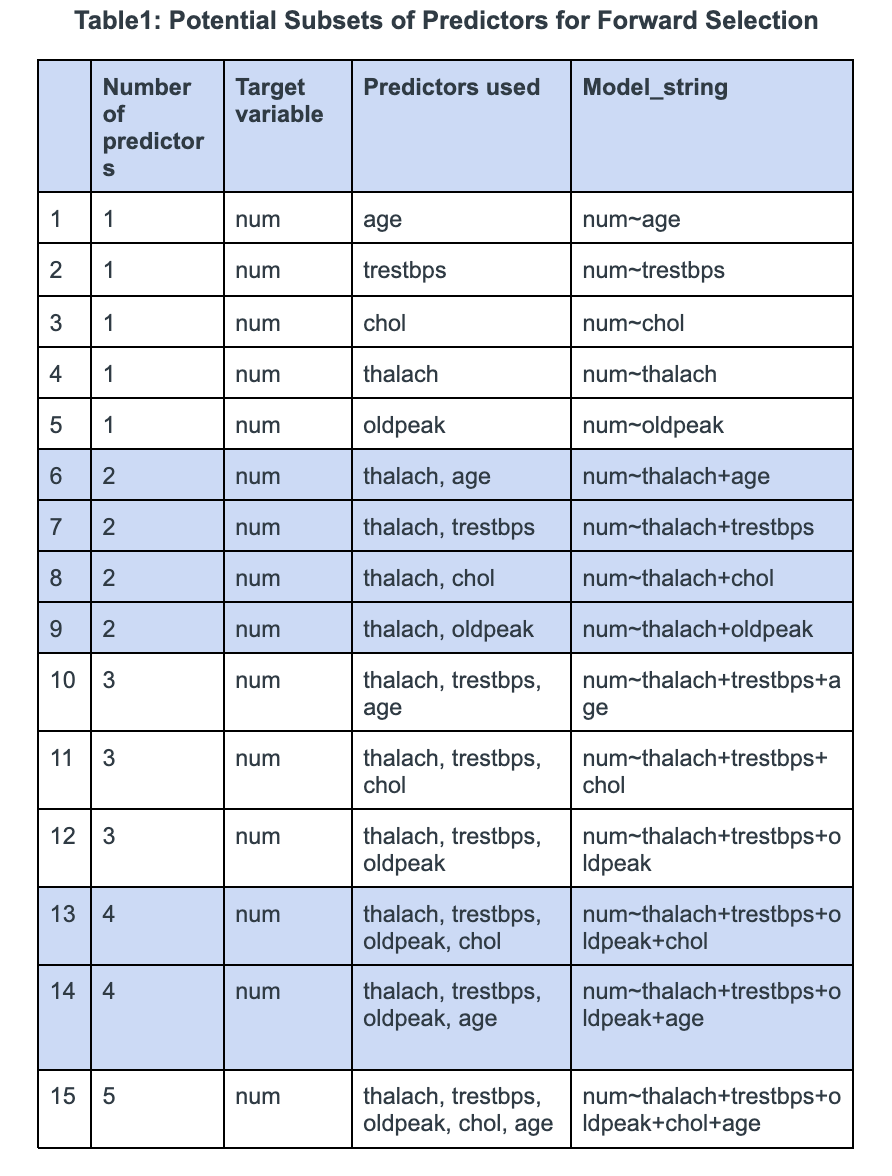

### Data summary

1. Only classifiers with the maximum accuracy per number of predictors were printed to present the most important data.

    a. For example, for one predictor, only the accuracy of the highest accuracy was printed alongside its model string.

### Testing true accuracy with Testing Dataset

1. Based on the summary of classifiers provided, the true accuracy was computed with testing data split earlier.  This is to see if there are scenarios with high estimator accuracy but low true accuracy (Timbers et al., 2022).  

### Visualization 

1. (Figure 1) Simultaneous line and scatter plot is plotted.
Number of predictors on the x-axis

    a. Estimated cross-validation accuracy on the y-axis. 

2. (Figure 2) An accompanying line and scatter plot are plotted.
Number of predictors on the x-axis

    b. Estimated accuracy using testing data on the y-axis.



### Reading, Tidying, and Wrangling Data

Firstly, we read one dataset(processed.cleveland.data) directly from the web, gave every column a specific header name, and selected the columns we were interested in. The columns selected consist of relevant numerical variables. We then converted every column into the correct and most appropriate data type. Now, all the data is in a tidy format.

In [3]:
con_names1<-c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang", "oldpeak","slope","ca","thal","num")
heart_cleveland<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = con_names1)

cleveland_mutate<-heart_cleveland|>
filter(num==0|num==1)|>
select(age,trestbps,chol,thalach,oldpeak,num)|>
mutate(age=as.integer(age))|>
mutate(num=as.factor(num))|>
mutate(trestbps=as.double(trestbps))|>
mutate(thalach=as.double(thalach))|>
mutate(oldpeak=as.double(oldpeak))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Cleaning Table


In [4]:
number_of_heartdisease_vs_no_heart_disease<-cleveland_mutate|>
group_by(num)|>
summarize(n=n())|>
mutate("Diagnosis_of_heart_disease"=num)|>
mutate("Number"=n)|>
select(-num,-n)

levels(number_of_heartdisease_vs_no_heart_disease$Diagnosis_of_heart_disease) <- c("negative","positive")

number_of_heartdisease_vs_no_heart_disease


percentage_of_heartdisease <- cleveland_mutate|>
summarize("percentage of positive heart disease (%)"= sum(num==1))*100/nrow(cleveland_mutate)

percentage_of_heartdisease

percentage_of_no_heartdisease <- cleveland_mutate|>
summarize("percentage of negative heart disease (%)"= sum(num==0))*100/nrow(cleveland_mutate)

percentage_of_no_heartdisease

Diagnosis_of_heart_disease,Number
<fct>,<int>
negative,164
positive,55


percentage of positive heart disease (%)
<dbl>
25.11416


percentage of negative heart disease (%)
<dbl>
74.88584


**Tibble 2(a,b)** -2A is the top tibble, 2B is the middle tibble, and 2C is the bottom tibble.

The number of individuals with a negative diagnosis supersedes the number of individuals with a positive diagnosis, 164 (negative) vs 55 (positive)**(2A)**.This resulted in an imbalance in the categorial variable we are trying to predict. K-nearest neighbors classification may not perform well with imbalance of cateorical variable. The percentage of positive heart disease is ~25% **(2B)**, which is significantly less than the ~75% (2C) of negative heart disease. Therefore we have to upsample the data, and this rebalances the data by multiplying the rarer class, "positive" (Timbers et al., 2022).



In [5]:
ups_recipe <- recipe(num~., data = cleveland_mutate)|>
step_upsample(num, over_ratio = 1, skip = FALSE)|>
prep()

upsampled_cleveland<- bake(ups_recipe, cleveland_mutate)

upsampled_heartdisease_HD_vs_noHD<-upsampled_cleveland|>
group_by(num)|>
summarize(n=n())|>
mutate("Diagnosis_of_heart_disease"=num)|>
mutate("Number"=n)|>
select(-num,-n)

levels(upsampled_heartdisease_HD_vs_noHD$Diagnosis_of_heart_disease) <- c("negative","positive")

upsampled_heartdisease_HD_vs_noHD

Diagnosis_of_heart_disease,Number
<fct>,<int>
negative,164
positive,164


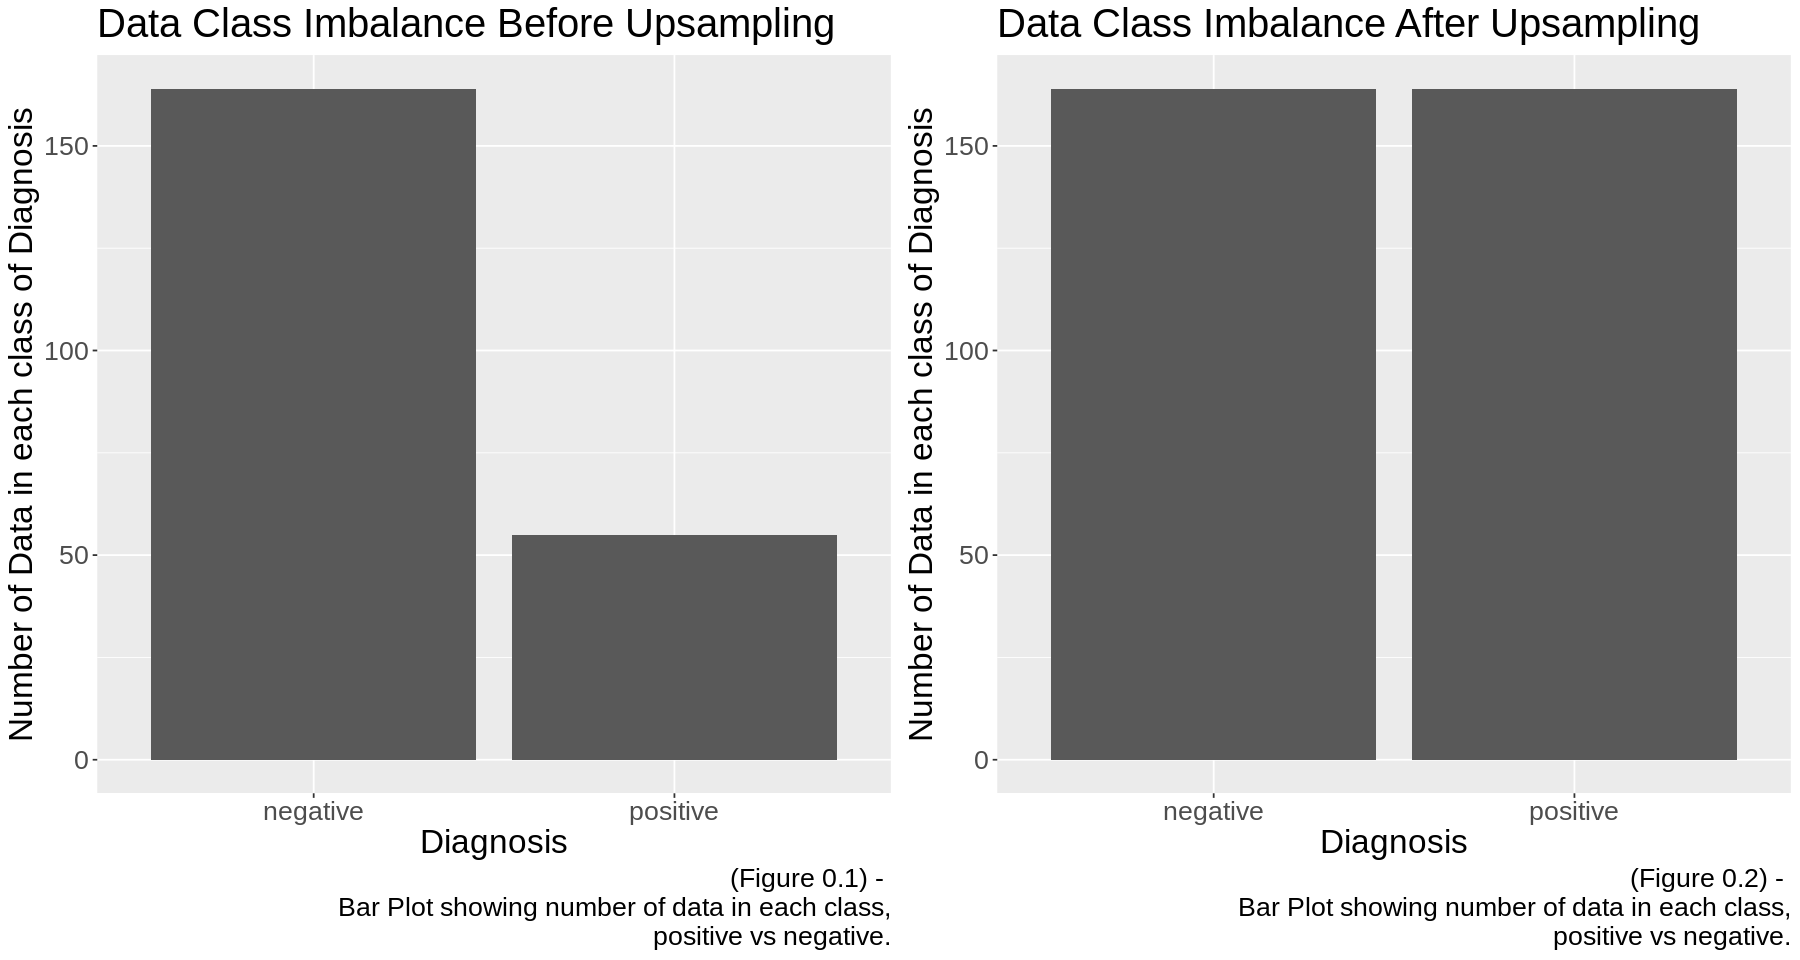

In [6]:
options(repr.plot.width=15, repr.plot.height=8)
before_upsampling <- ggplot(number_of_heartdisease_vs_no_heart_disease, aes(x = Diagnosis_of_heart_disease, y = Number))+
geom_bar(stat="identity")+
labs(x="Diagnosis",y="Number of Data in each class of Diagnosis", caption ="(Figure 0.1) - 
Bar Plot showing number of data in each class,
positive vs negative.")+
ggtitle("Data Class Imbalance Before Upsampling")+
theme(text = element_text(size = 20))

        
after_upsampling <- ggplot(upsampled_heartdisease_HD_vs_noHD, aes(x = Diagnosis_of_heart_disease, y = Number))+
geom_bar(stat="identity")+
labs(x="Diagnosis",y="Number of Data in each class of Diagnosis", caption ="(Figure 0.2) - 
Bar Plot showing number of data in each class,
positive vs negative.")+
ggtitle("Data Class Imbalance After Upsampling")+
theme(text = element_text(size = 20))

plot_grid(before_upsampling, after_upsampling, ncol = 2)

_**Figure 0.1** shows original unbalanced data, unsuited for the KNN-classification model.  **Figure 0.2** shows balanced data after upsampling, which is better suited for the KNN-classification model._

### Data Split

In [7]:
set.seed(88)
upsampled_cleveland_split <- initial_split(upsampled_cleveland, prop = 0.75, strata = num)
upsampled_cleveland_training <- training(upsampled_cleveland_split)
upsampled_cleveland_testing <- testing(upsampled_cleveland_split)

upsampled_cleveland_training#print upsampled training data

age,trestbps,chol,thalach,oldpeak,num
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,0
56,120,236,178,0.8,0
57,120,354,163,0.6,0
57,140,192,148,0.4,0
52,172,199,162,0.5,0
⋮,⋮,⋮,⋮,⋮,⋮
63,108,269,169,1.8,1
35,120,198,130,1.6,1
67,120,229,129,2.6,1


**Tibble 4** display training dataset only; upsampled_cleveland_testing stores testing data but is not used until close to the bottom of the analysis.

Data is split into a training dataset and a testing dataset where strata = num, ensuring that roughly the same proportion of 0 and 1(0 means no diagnosis; 1 means diagnosed) ends up in both training and testing datasets. In the following steps, we will begin dataset analysis. To visit the exploratory analysis, please view the proposal document instead. 

### Method to Pick Optimal K via Cross-Validation
##### Verification for Forward Selection (It picks optimal neighbors value)

Here we used the first classifier as an example to find optimal K by picking the neighbors with the highest cross-validation accuracy. We use the first classifier's accuracy to verify that the loop below utilizes optimal neighbor value to perform forward selection to optimize cross-validation estimated accuracy.  

We used 5 folds because it was computationally reasonable.

Furthermore, the number of neighbors was selected from 1 to 30 to explore if the selected K value is an obvious peak or if other nearest neighbor values are also reasonable choices.  

In [8]:
set.seed(88)
#Visualization for the cross-validation
example_vfold <- vfold_cv(upsampled_cleveland_training, v = 5, strata = num)

example_recipe <- recipe(num ~ thalach, data = upsampled_cleveland_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# neighbors = tune() helps us find the best K from a set of K values 
example_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(1, 30))
example_results <- workflow() |>
  add_recipe(example_recipe) |>
  add_model(example_spec) |>
  tune_grid(resamples = example_vfold, grid = k_vals) |>
  collect_metrics()


example_accuracies <- example_results |>
  filter(.metric == "accuracy")

arranged_example_accuracies <- example_accuracies|>
select(neighbors, mean)|>
arrange(desc(mean))

arranged_example_accuracies

neighbors,mean
<int>,<dbl>
17,0.6463333
13,0.6461667
15,0.6383333
14,0.6381667
20,0.6381667
⋮,⋮
4,0.5815000
5,0.5773333
6,0.5693333


**Tibble 5:** Here, estimated accuracies (mean) were ranked in descending order for neighbors 1-30. 17 neighbors yielded the highest estimated accuracy. This is plotted below to visualize that the K value is the best value, given a computationally reasonable range.

Even though 64.6% is the max accuracy at neighbors = 17, neighbors 13, 15, 14, 20 achieve similar estimated accuracies and therefore are also valid options.

To validate that the forward selection uses the best K, following comparison to model string, the first classifier built (model_string: num ~ thalach) should also have a 64.63333% accuracy.

neighbors,mean
<int>,<dbl>
17,0.6463333


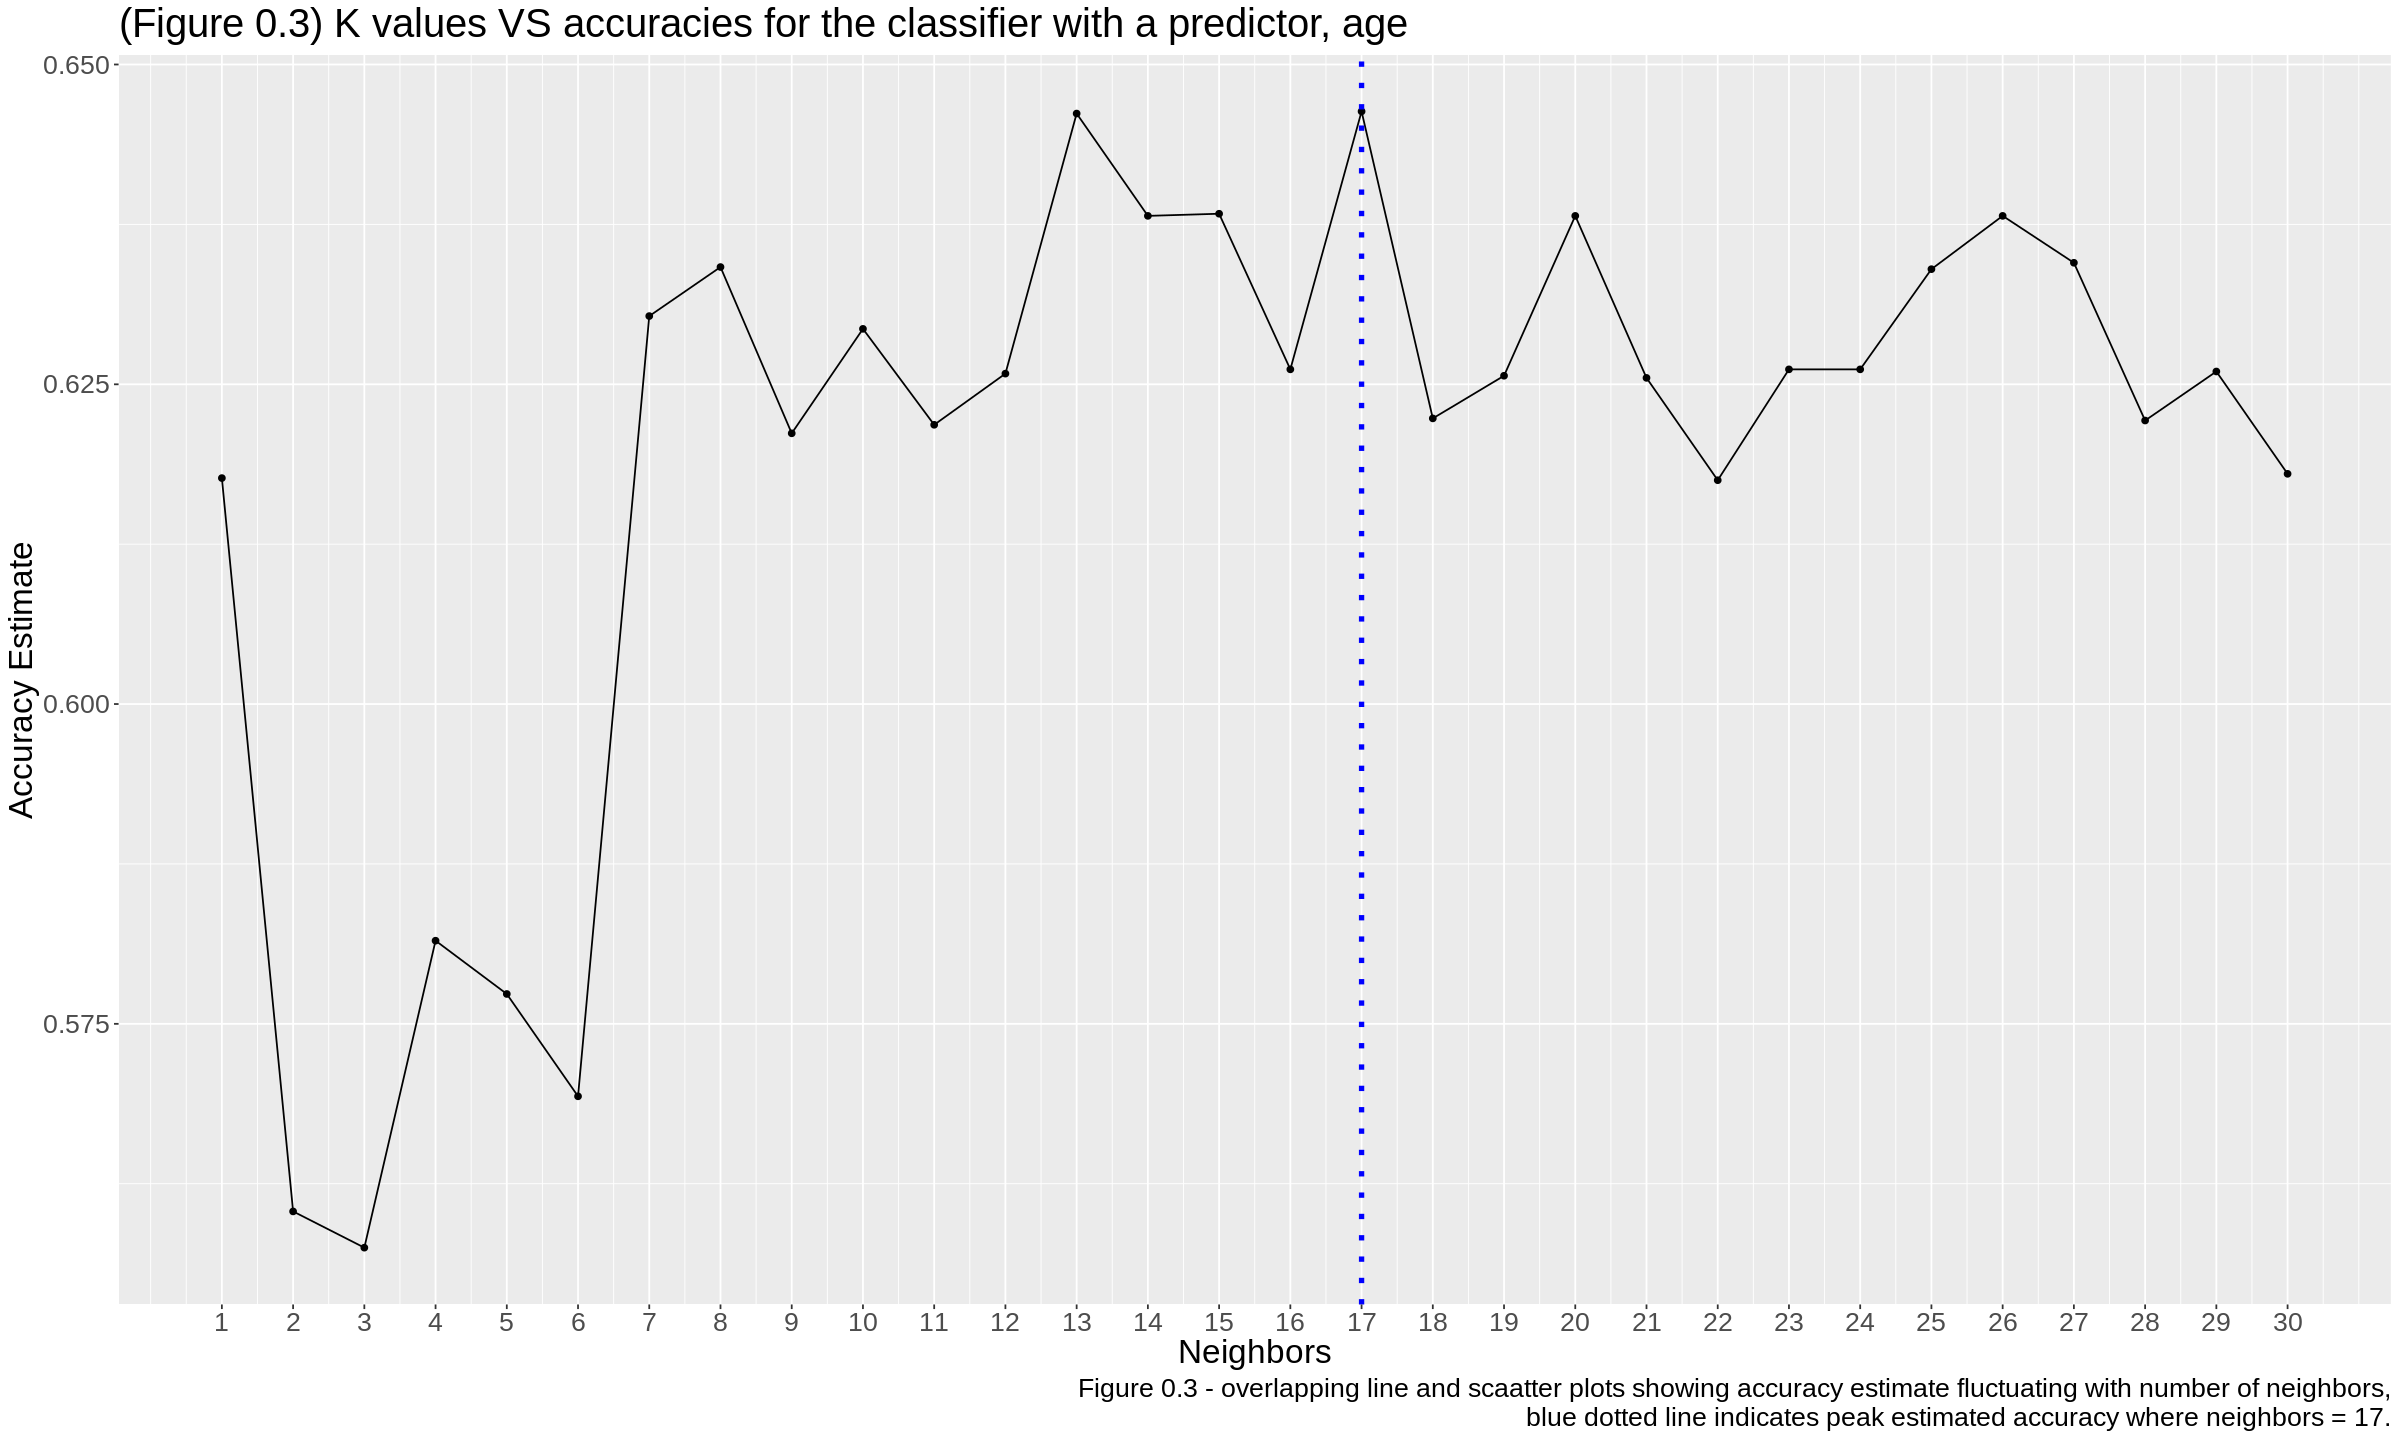

In [9]:
# plot of K values against their respective accuracies
options(repr.plot.width=20, repr.plot.height=12)
example_cross_val_plot <- example_accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", 
        caption ="Figure 0.3 - overlapping line and scaatter plots showing accuracy estimate fluctuating with number of neighbors,
blue dotted line indicates peak estimated accuracy where neighbors = 17.") +
    ggtitle("(Figure 0.3) K values VS accuracies for the classifier with a predictor, age")+
    theme(text = element_text(size = 20))+
    geom_vline(xintercept = 17, linetype="dotted", 
                color = "blue", size=1.5)+
    scale_x_continuous(breaks = c(1:30))

example_cross_val_plot
slice(arranged_example_accuracies, n = 1) ###slice from tibble 5


**Note:** Top tibble is made by filtering the first row from tibble 5

**Figure 0.3** is an overlapped scatterplot and line plot. This plot tells us the visulatizaion information same provided above. Caption emphasizes plot details.


## Forward Selection Code

**Note:** This code takes a very long time to load and is computationally expensive.  Thanks for your time!

In [10]:
#Code Resource: The following code was adapted from the textbook from Chapter 6 of "Data Science: A First Introduction" (Timbers et al., 2022)
set.seed(88)
#extract variable names from the upsampled cleveland training sub dataset
names <- colnames(upsampled_cleveland_training|> select(-num))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
heartdisease_vfold <- vfold_cv(upsampled_cleveland_training, v = 5, strata = num)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("num", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        hd_recipe <- recipe(as.formula(model_string), 
                                data = upsampled_cleveland_training) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())
        
            # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(hd_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heartdisease_vfold, grid = k_vals) |>
          collect_metrics() |>
          filter(.metric == "accuracy")|>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()


        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
        
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
   


#### Verification


In [11]:
slice(arranged_example_accuracies, n = 1)
slice(accuracies, n = 1)

neighbors,mean
<int>,<dbl>
17,0.6463333


size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ thalach,0.6463333


**Tibble 8A, B** (8A is the top tibble, 8B is the bottom tibble) Above, we can verify that the loop code does pick the best K when estimating cross-validation accuracy. 64.63333% estimated accuracy is yielded for both the forward selection loop (8B) and the manual cross-validation method (8A) printed above.

## Forward Selection Analysis

In [12]:
accuracies   
upsampled_heartdisease_HD_vs_noHD

size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ thalach,0.6463333
2,num ~ thalach+trestbps,0.8211667
3,num ~ thalach+trestbps+oldpeak,0.8213333
4,num ~ thalach+trestbps+oldpeak+chol,0.8665000
5,num ~ thalach+trestbps+oldpeak+chol+age,0.8703333


Diagnosis_of_heart_disease,Number
<fct>,<int>
negative,164
positive,164


**Tibble 6** The estimated accuracies from the forward selection method printed the best classifier with each classifier size separated by blue columns in table 1.  

**Tibble 3**- Tibble 3 is printed on top when checking if the data is balanced.

Initial viewing of the **tibble 6** yielded that each numerical variable increased the estimator accuracy. thalach was 14.6% higher than no predictor model (50% chance of making each prediction since data is balanced) **(3)** 

The second classifier with `trestbps` yielded 82.11667% accuracy which is ~17.5% gain in estimated accuracy. This is a substantial relevant predictor.

The third predictor, `oldpeak`, contributed negligible amounts to the classifier with less than a 0.02% improvement. 

The forth predictor, `chol`, gave the predictor an additional 4.5% estimated cross-validation accuracy. This is also substantial, especially in life-or-death circumstances such as heart disease. 

The final predictor, `age`, yielded a ~3.8% gain in estimator accuracy.

## Plotting Highest Accuracy

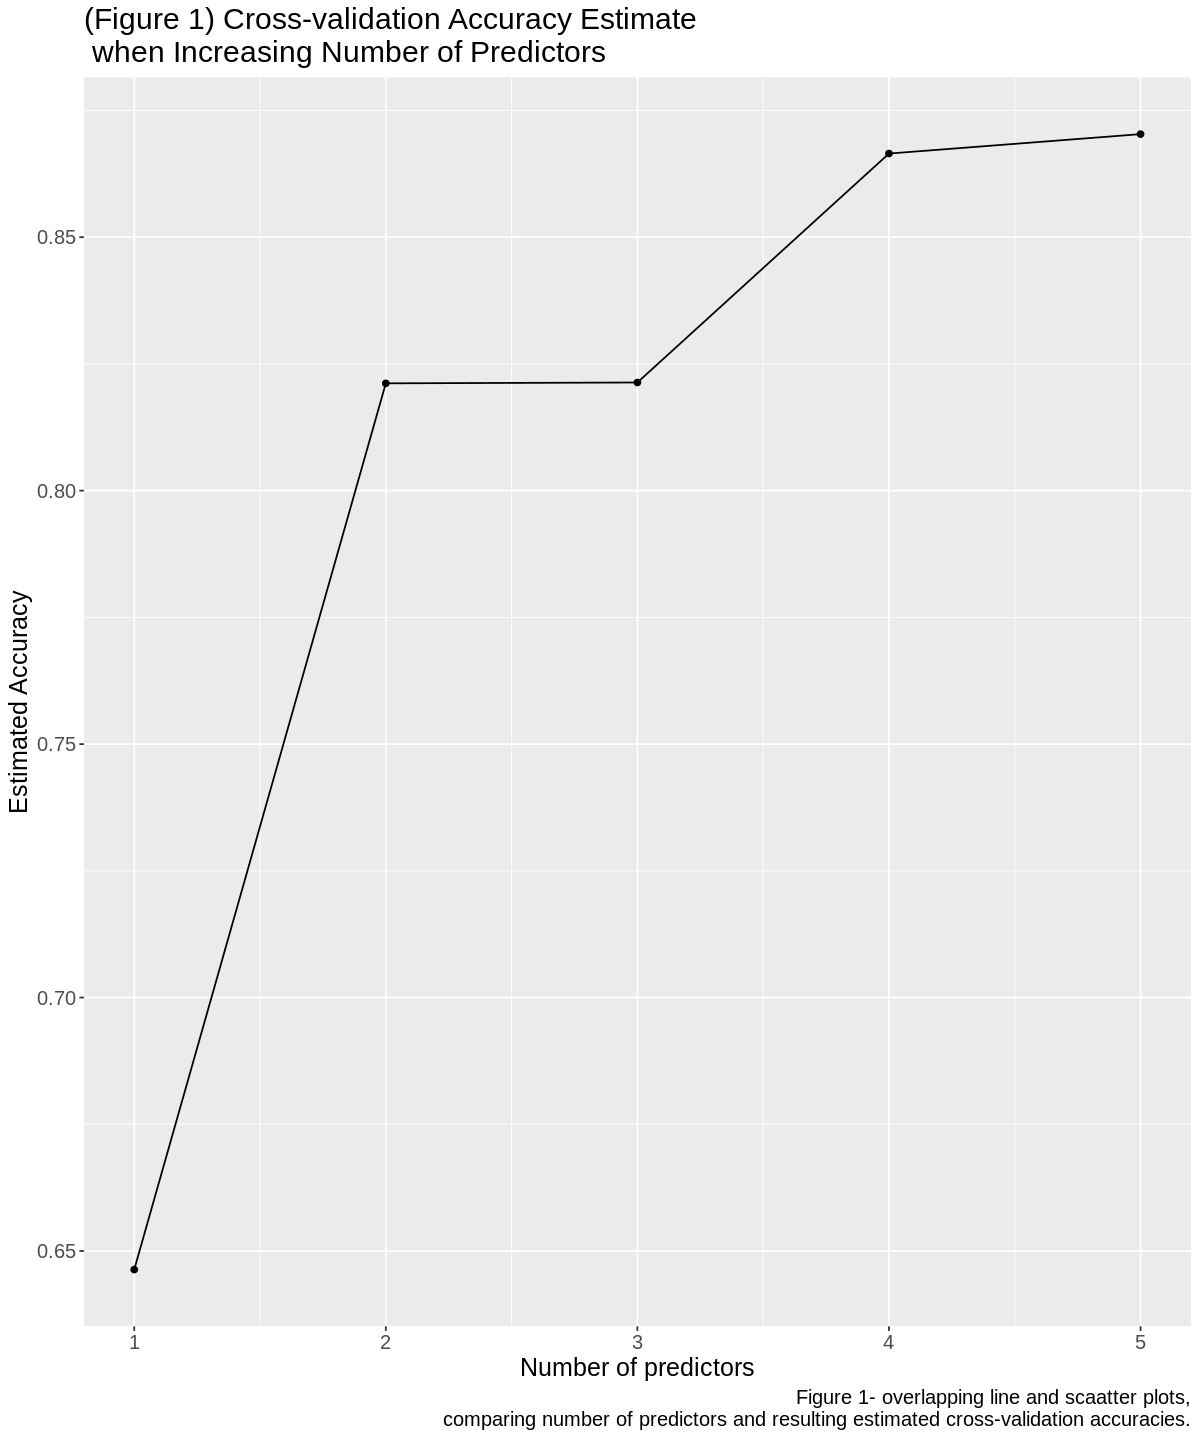

In [13]:
options(repr.plot.width=10, repr.plot.height=12)
accuracies_cross_validation_plot<-accuracies|>
ggplot(aes(x=size,y=accuracy))+
geom_point()+
geom_line()+
labs(x="Number of predictors",y="Estimated Accuracy",
     caption ="Figure 1- overlapping line and scaatter plots,
comparing number of predictors and resulting estimated cross-validation accuracies.")+
theme(text=element_text(size=20))+
ggtitle("(Figure 1) Cross-validation Accuracy Estimate \n when Increasing Number of Predictors")+
theme(text = element_text(size = 15))


accuracies_cross_validation_plot

**Figure 1** emphasizes qualitatively what each additional predictor would do to the classifier (add or distract the accuracy estimate).  

The steeper the slope, the more effective it would be on the classifier. If the derivative (slope) is positive, it will increase the estimated accuracy, thus a relevant predictor. If the derivative (slope) is ~0, the predictor is not relevant or irrelevant and does not distract the classifier. If the slope is negative, noise is increased, thus an irrelevant predictor. The slope is the steepest when adding `trestbps` as a predictor, indicating the most relevant predictor. The slopes are all positive except for when adding the third predictor, `oldpeak`, which yielded an almost 0 slope. This predictor contributed least to the classifier. There were no negative slopes indicating no irrelevant predictors. Quantitative analysis is located above.

## Comparing to Testing Data

It is valuable to compute accuracies of making predictions to data it has never seen before (testing data). Earlier, we split data into training and testing data and used only the training data to train our model. Here we cross-validate, retrain and recreate 5 classifiers created above with the same model strings. We then predict and compute its true accuracy by comparing the predicted class and the true class in the testing dataset.

In [14]:
set.seed(88)
#test the five classifiers on the testing dataset
heartDisease_vfold <- vfold_cv(upsampled_cleveland_training, v = 5, strata = num)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

#classifier with 1 predictor, thalach.
recipe_size1 <- recipe(num ~ thalach, data = upsampled_cleveland_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

best_k_size1 <- workflow() |>
  add_recipe(recipe_size1) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heartDisease_vfold, grid = k_vals) |>
  collect_metrics()|>
  filter(.metric == "accuracy")|>
  arrange(desc(mean))|>
  head(1)|>
  pull(neighbors)

best_spec_size1 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_size1) |>
         set_engine("kknn") |>
         set_mode("classification")


accuracy_testing_dataset_size1 <- workflow() |>
         add_recipe(recipe_size1) |>
         add_model(best_spec_size1) |>
         fit(data = upsampled_cleveland_training)|>
          predict(upsampled_cleveland_testing) |>
          bind_cols(upsampled_cleveland_testing) |>
          metrics(truth = num, estimate = .pred_class)|>
          filter(.metric == "accuracy")|>
          pull(.estimate)
          

#classifier with 2 predictor, thalach and trestbps.
recipe_size2 <- recipe(num ~ thalach+trestbps, data = upsampled_cleveland_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

best_k_size2 <- workflow() |>
  add_recipe(recipe_size2) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heartDisease_vfold, grid = k_vals) |>
  collect_metrics()|>
  filter(.metric == "accuracy")|>
  arrange(desc(mean))|>
  head(1)|>
  pull(neighbors)

best_spec_size2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_size2) |>
         set_engine("kknn") |>
         set_mode("classification")

accuracy_testing_dataset_size2 <- workflow() |>
         add_recipe(recipe_size2) |>
         add_model(best_spec_size2) |>
         fit(data = upsampled_cleveland_training)|>
          predict(upsampled_cleveland_testing) |>
          bind_cols(upsampled_cleveland_testing) |>
          metrics(truth = num, estimate = .pred_class)|>
          filter(.metric == "accuracy")|>
          pull(.estimate)

#classifier with 3 predictor, thalach, trestbps, and oldpeak.
recipe_size3 <- recipe(num ~ thalach+trestbps+oldpeak, data = upsampled_cleveland_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

best_k_size3 <- workflow() |>
  add_recipe(recipe_size3) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heartDisease_vfold, grid = k_vals) |>
  collect_metrics()|>
  filter(.metric == "accuracy")|>
  arrange(desc(mean))|>
  head(1)|>
  pull(neighbors)

best_spec_size3 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_size3) |>
         set_engine("kknn") |>
         set_mode("classification")

accuracy_testing_dataset_size3 <- workflow() |>
         add_recipe(recipe_size3) |>
         add_model(best_spec_size3) |>
         fit(data = upsampled_cleveland_training)|>
          predict(upsampled_cleveland_testing) |>
          bind_cols(upsampled_cleveland_testing) |>
          metrics(truth = num, estimate = .pred_class)|>
          filter(.metric == "accuracy")|>
          pull(.estimate)

#classifier with 4 predictor, thalach, trestbps, oldpeak, and chol.
recipe_size4 <- recipe(num ~ thalach+trestbps+oldpeak+chol, data = upsampled_cleveland_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

best_k_size4 <- workflow() |>
  add_recipe(recipe_size4) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heartDisease_vfold, grid = k_vals) |>
  collect_metrics()|>
  filter(.metric == "accuracy")|>
  arrange(desc(mean))|>
  head(1)|>
  pull(neighbors)

best_spec_size4 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_size4) |>
         set_engine("kknn") |>
         set_mode("classification")

accuracy_testing_dataset_size4 <- workflow() |>
         add_recipe(recipe_size4) |>
         add_model(best_spec_size4) |>
         fit(data = upsampled_cleveland_training)|>
          predict(upsampled_cleveland_testing) |>
          bind_cols(upsampled_cleveland_testing) |>
          metrics(truth = num, estimate = .pred_class)|>
          filter(.metric == "accuracy")|>
          pull(.estimate)

#classifier with 5 predictor, thalach, trestbps, oldpeak, chol, and age.
recipe_size5 <- recipe(num ~ thalach+trestbps+oldpeak+chol+age, data = upsampled_cleveland_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

best_k_size5 <- workflow() |>
  add_recipe(recipe_size5) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heartDisease_vfold, grid = k_vals) |>
  collect_metrics()|>
  filter(.metric == "accuracy")|>
  arrange(desc(mean))|>
  head(1)|>
  pull(neighbors)

best_spec_size5 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_size5) |>
         set_engine("kknn") |>
         set_mode("classification")

accuracy_testing_dataset_size5 <- workflow() |>
         add_recipe(recipe_size5) |>
         add_model(best_spec_size5) |>
         fit(data = upsampled_cleveland_training)|>
          predict(upsampled_cleveland_testing) |>
          bind_cols(upsampled_cleveland_testing) |>
          metrics(truth = num, estimate = .pred_class)|>
          filter(.metric == "accuracy")|>
          pull(.estimate)

In [15]:
# collect the resulting accuracies from the cell above
size<-list(1, 2, 3, 4, 5)
model_string<-list("num ~ thalach", 
                   "num ~ thalach+trestbps",
                   "num ~ thalach+trestbps+oldpeak",
                   "num ~ thalach+trestbps+oldpeak+chol",
                   "num ~ thalach+trestbps+oldpeak+chol+age")
accuracy <- list(accuracy_testing_dataset_size1,
                 accuracy_testing_dataset_size2,
                 accuracy_testing_dataset_size3,
                 accuracy_testing_dataset_size4,
                 accuracy_testing_dataset_size5)

testing_accuracies<-tibble(size|>unlist(), model_string|>unlist(), accuracy|>unlist())|>
rename(size="unlist(size)", model_string="unlist(model_string)",accuracy="unlist(accuracy)")
col_names <- c("size", "model_string", "accuracy")

testing_accuracies

size,model_string,accuracy
<dbl>,<chr>,<dbl>
1,num ~ thalach,0.5731707
2,num ~ thalach+trestbps,0.7317073
3,num ~ thalach+trestbps+oldpeak,0.7926829
4,num ~ thalach+trestbps+oldpeak+chol,0.8414634
5,num ~ thalach+trestbps+oldpeak+chol+age,0.8048780


**Tibble 7:** This tibble includes the `model_string` and the testing `accuracy`.

In [16]:
accuracies   

size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ thalach,0.6463333
2,num ~ thalach+trestbps,0.8211667
3,num ~ thalach+trestbps+oldpeak,0.8213333
4,num ~ thalach+trestbps+oldpeak+chol,0.8665000
5,num ~ thalach+trestbps+oldpeak+chol+age,0.8703333


**Tibble 6** from above includes the estimated cross-validation accuracies from forward selection method.  

Comparing the two tables allows quantitative analysis. All numerical predictors from testing data yielded true accuracy of ~57% to ~80%, whereas accuracies from cross-validation data yielded a slightly higher accuracy range of ~65% to ~87%. Each predictor using cross-validation yielded higher accuracy estimates than testing data but are within a maximum of ~9% difference.

The mean difference percentage is calculated below:

In [17]:
mean_cv <- accuracies|>
summarize(mean = mean(accuracy))|>
pull()

mean_ta <- testing_accuracies|>
summarize(mean = mean(accuracy))|>
pull()

mean_difference <- (mean_cv-mean_ta)*100
mean_difference

[1] 5.635285

A ~5.6% difference in mean difference is reasonable and is likely to do with a new dataset, and there is an element of luck associated with prediction accuracy. The testing accuracy could be both higher and lower than the testing accuracy, depending on the seed value.

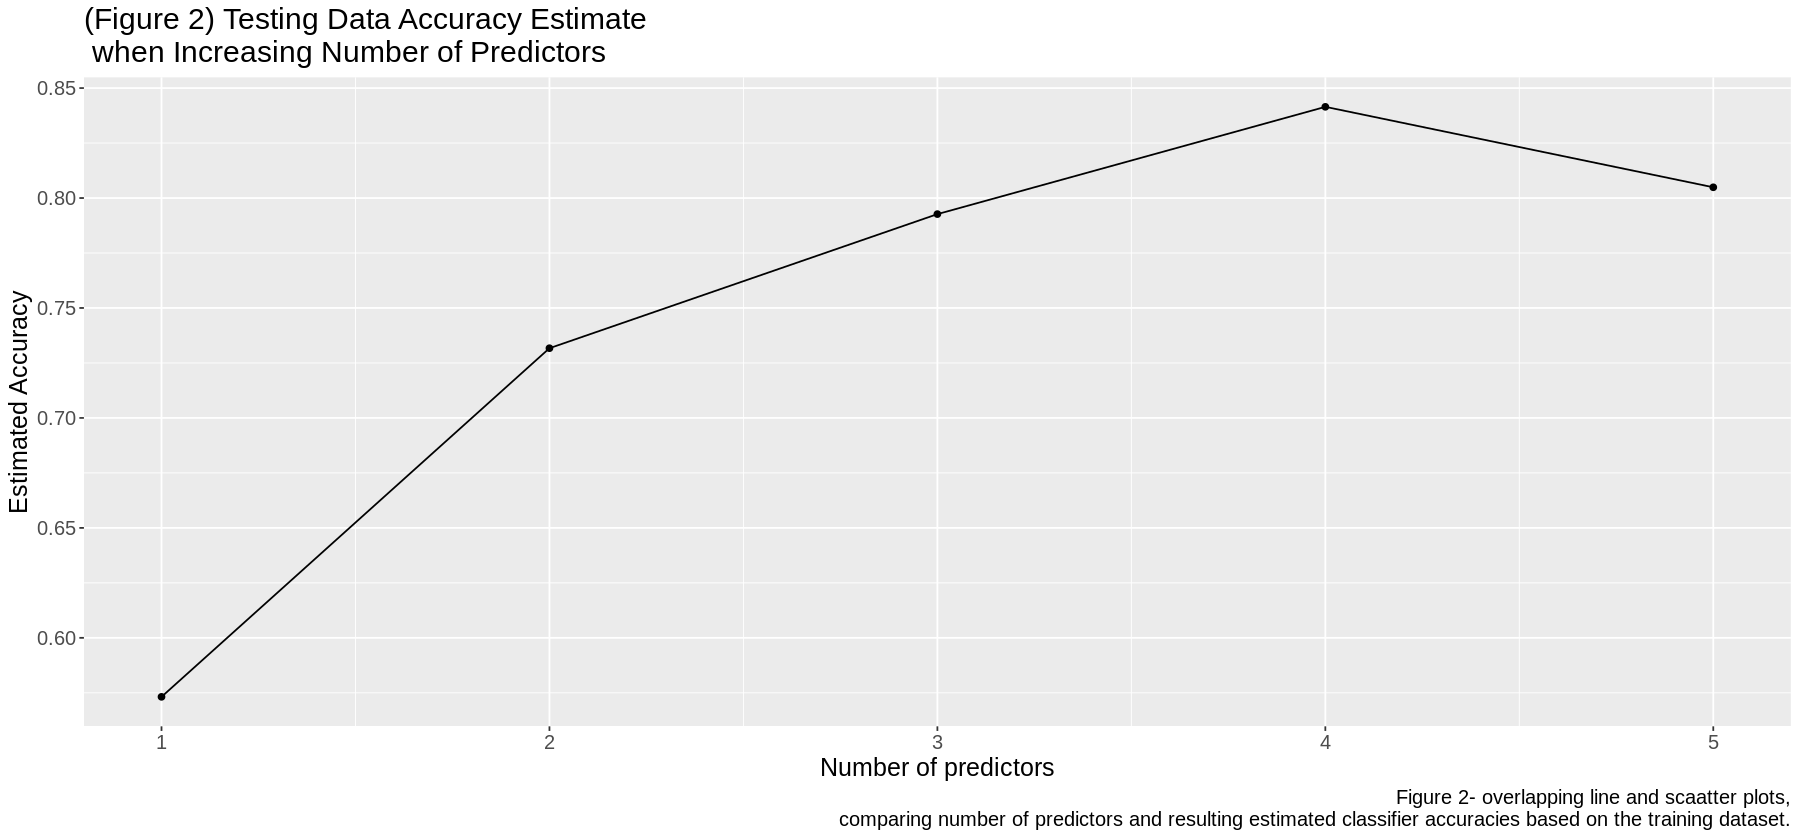

In [18]:
options(repr.plot.width=15, repr.plot.height=7)
accuracies_testing_data_plot<-testing_accuracies|>
ggplot(aes(x=size,y=accuracy))+
geom_point()+
geom_line()+
labs(x="Number of predictors",y="Estimated Accuracy",
     caption ="Figure 2- overlapping line and scaatter plots,
comparing number of predictors and resulting estimated classifier accuracies based on the training dataset.")+
theme(text=element_text(size=20))+
ggtitle("(Figure 2) Testing Data Accuracy Estimate \n when Increasing Number of Predictors")+
theme(text = element_text(size = 15))


accuracies_testing_data_plot

**Figure 2** For qualitative analysis, testing predictor accuracy has age as an irrelevant predictor, which diverges from cross-validation accuracy analysis. The difference yielded a decrease in estimator accuracy of 0.38%, which is not negligible but is minimal. This anomaly can likely be explained with a smaller testing dataset and a different dataset. The number of both training and testing data is printed below. Testing Data is three folds smaller than training data.

In [19]:
nrow(upsampled_cleveland_training)
nrow(upsampled_cleveland_testing)

[1] 246

[1] 82

## Overlapping Cross-validation and Testing Accuracies Qualitative Comparison


[1] 5.635285

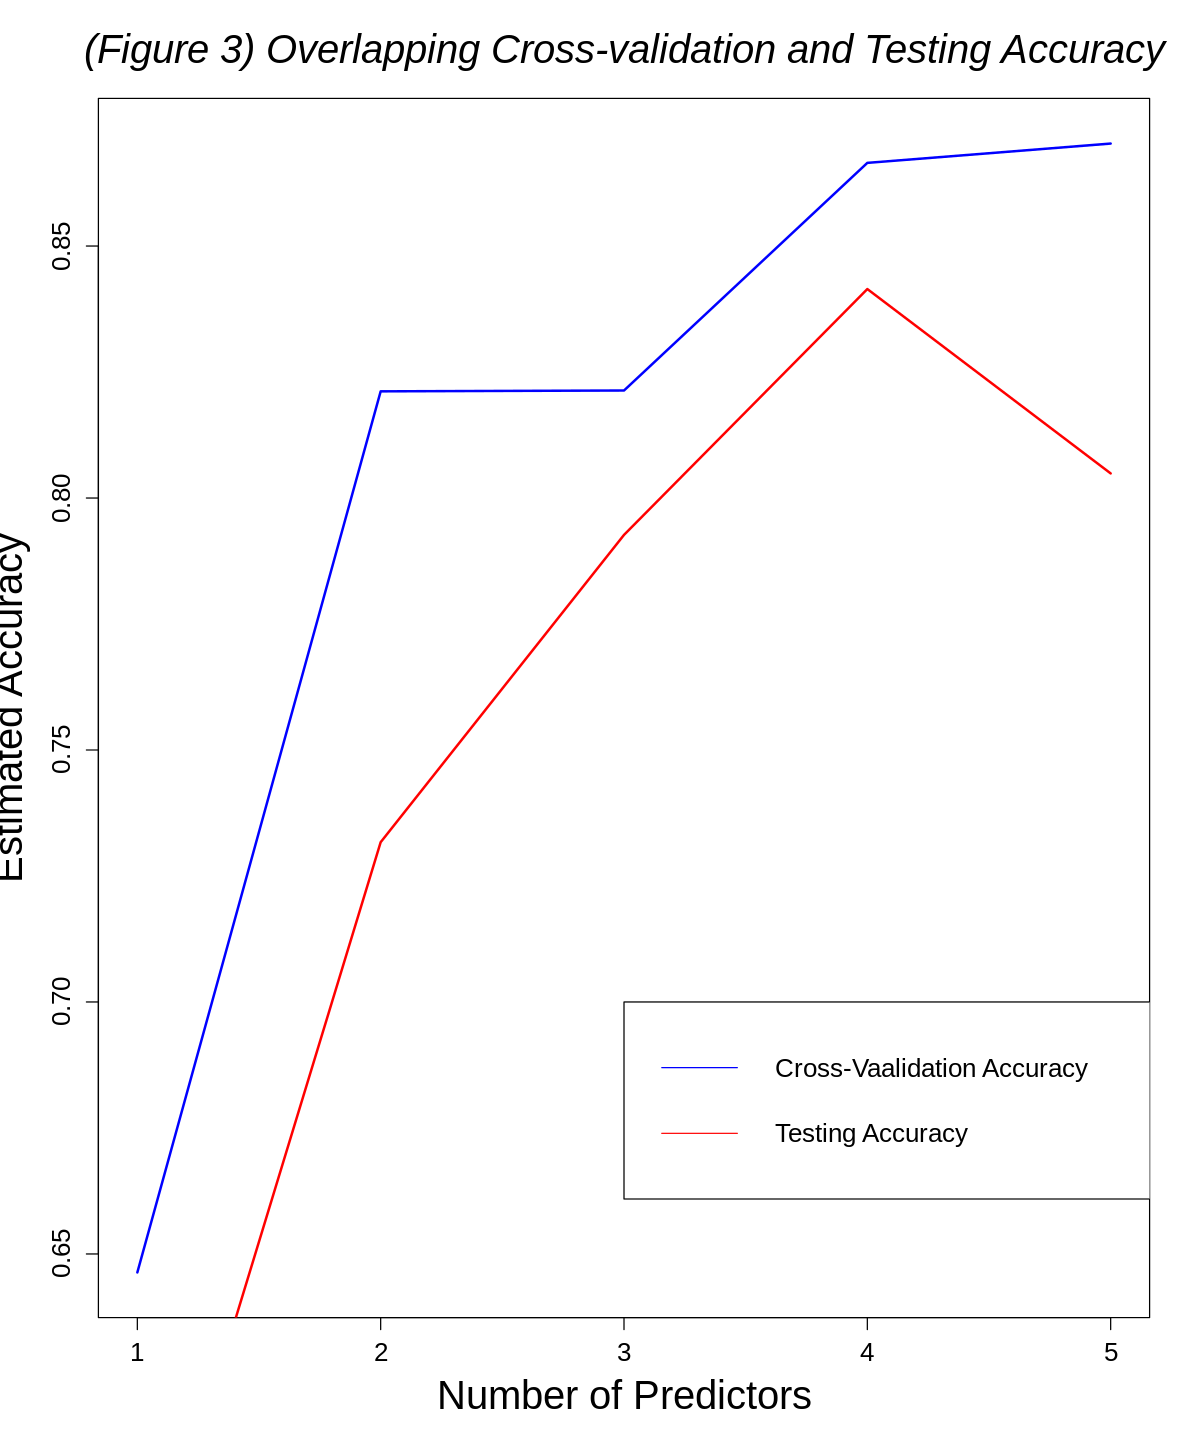

In [20]:
options(repr.plot.width=10, repr.plot.height=12)
`Number of Predictors` = c(1, 2, 3, 4, 5)
`Estimated Accuracy` = c(0.6463333, 0.8211667, 0.8213333, 0.8665000, 0.8703333)
x2 = c(1, 2, 3, 4, 5)
y2 = c(0.5731707, 0.7317073, 0.7926829, 0.8414634, 0.8048780)

plot(`Number of Predictors`, `Estimated Accuracy`, cex.lab = 2, type='l', col='blue', lty = 1,pch=19,lwd=2, cex.axis = 1.3)
lines(x2, y2, col='red', lty = 1,pch=19,lwd=2)
legend(3, 0.7, legend=c('Cross-Vaalidation Accuracy', 'Testing Accuracy'),col=c('blue', 'red'), lty=1, cex = 1.3)

title(main ="(Figure 3) Overlapping Cross-validation and Testing Accuracy", font.main =3, col.main = "black", cex.main=2)

mean_difference

_**Figure 3 caption :** Blue line is the cross-validation estimator accuracy.  The red line is the testing accuracy_

Connected to quantitative analysis above, the mean difference is small, and the growth slopes are similar. An additional difference is that adding oldpeak just before the third predictor, yielded greater accuracies with testing data prediction but contributed minimally to cross-validation estimated accuracy. This is observed by the almost 0 slope in the cross-validation accuracy line, but a steep slope on the testing estimated accuracy line. This difference is also due to a different dataset and the specific seed.

### Confusion Matrix Analysis

In [21]:
confusion_matrix_for_size5 <- workflow() |>
         add_recipe(recipe_size5) |>
         add_model(best_spec_size5) |>
         fit(data = upsampled_cleveland_training)|>
          predict(upsampled_cleveland_testing) |>
          bind_cols(upsampled_cleveland_testing) |>
          conf_mat(truth = num, estimate = .pred_class)

confusion_matrix_for_size5


          Truth
Prediction  0  1
         0 30  5
         1 11 36

**matrix 1:** Confusion Matrix

We wrap up our analysis touching upon the significance of this data. We trusted our cross-validation accuracy over testing accuracy because of the larger dataset and 5 cross folds instead of only 1 split in testing accuracy calculation. We used all 5 predictors to build the classifier and tested it with our testing data to form the confusion matrix.

We computed the confusion matrix to collect the true negative (top left), true positive(bottom right), false negative (top right), and false positive (bottom left). 80.5% correct predictions were yielded when adding the true positive and true negative percentages. When assessing false positives, 13% yielded a false positive result, which is not fatal because the patient can simply do more testing. This, however, does have a financial cost. 6% yielded a false negative, which means that 1 in 16 to 17 will be misdiagnosed. This classifier should be further adjusted to minimize false negatives before being ethically integrated into the healthcare system. 

## Discussion

#### What we found
Forwards selection analysis yielded all numerical predictors to be a valuable addition to the estimator's accuracy. `Oldpeak` has an almost negligible increase, and `trestbps` has the largest positive contributor to the classifier's estimated accuracy.

When using training data to predict the testing data, testing data yielded a slightly lower estimated accuracy (~5.6%) than cross-validation estimated accuracy. Also, testing data showed `oldpeak` to be a relevant predictor and `age` to be an irrelevant predictor. But because the change was not drastic, the discrepancies can be justified by unseen random data. 

From our confusion matrix, false negatives were computed to be 6%, with our false positives at 13% and true predictions at 80.5%. The classifier with five predictors is stable. We can introduce the classifier in overflowing healthcare systems with a few adjustments to mitigate false negatives.

#### Comparison to Hypothesis (What we expected to find)

Initially, we hypothesized that all predictors were relevant predictors. This hypothesis was well supported with data provided.

However, it should be noted that `oldpeak` only contributed minimally to the increase in accuracy estimate.  However, `oldpeak` contributed significantly to testing data accuracy. Cross-validation accuracy estimates were more reliable and should be treated with more weight because the dataset is three folds larger and is cross folded five times.

#### Impact of Findings
Our classifier, even though not accurate enough to be integrated currently into healthcare systems, can pave a path to building a more accurate classifier by using different statistical analysis methods and collecting more data.

#### Future questions this could lead to
The 80.5% is a good start given a small dataset, which garners other data scientists and opens new avenues of research. Data scientists can look into other statistical analysis methods to improve the classifier. 

Data scientists can also look into regional impacts on the classifier. Whether classifiers have to be built per region or one global classifier is more optimal for accurate predictions. 

                                                     References

Berenson, A., & Reed, A. (2008). Weighing the Costs of a CT Scan’s Look Inside the Heart. https://www.nytimes.com/2008/06/29/business/29scan.html

Dua, D., & Graff, C. (2019). {UCI} Machine Learning Repository. University of California, Irvine, School of Information and 
>Computer Sciences, http://archive.ics.uci.edu/ml

Draper, Norman, and Harry Smith. (1966). Applied Regression Analysis. Wiley.
>Eforymson, M. (1966). “Stepwise Regression—a Backward and Forward Look.” In Eastern Regional Meetings of the Institute of Mathematical Statistics.

Levine, S., Malone, E., Lekiachvili, A., & Briss, P. (2019). Health Care Industry Insights: Why the Use of Preventive Services 
>Is Still Low. Health Care Systems, Public Health, and Communities: Population Health Improvements, 16 http://dx.doi.org/10.5888/pcd16.180625

Lu, P., Kong, D., & Shelley, M. (2021). Risk Perception, Preventive Behavior, and Medical Care Avoidance among American Older 
>Adults During the COVID-19 Pandemic. Journal of Aging and Health. https://doi.org/10.1177_08982643211002084

Timbers, T., Campbell, T., & Lee, M. (2022). Chapter 6 Classification II: evaluation & tuning. In R. Peng (Ed.), Data Science A 
>First Introduction ()

Weinick, R. M., Byron, S. C., & Bierman, A. S. (2005). Who Can't Pay for Health Care? Journal of General Internal Medicine, 
>20(6), 504-509. https://doi.org/10.1111/j.1525-1497.2005.0087.x


 



Note: This is not exactly formatted like APA because it's difficult to replicate with markdown. The screenshot below provides accurate formatting.

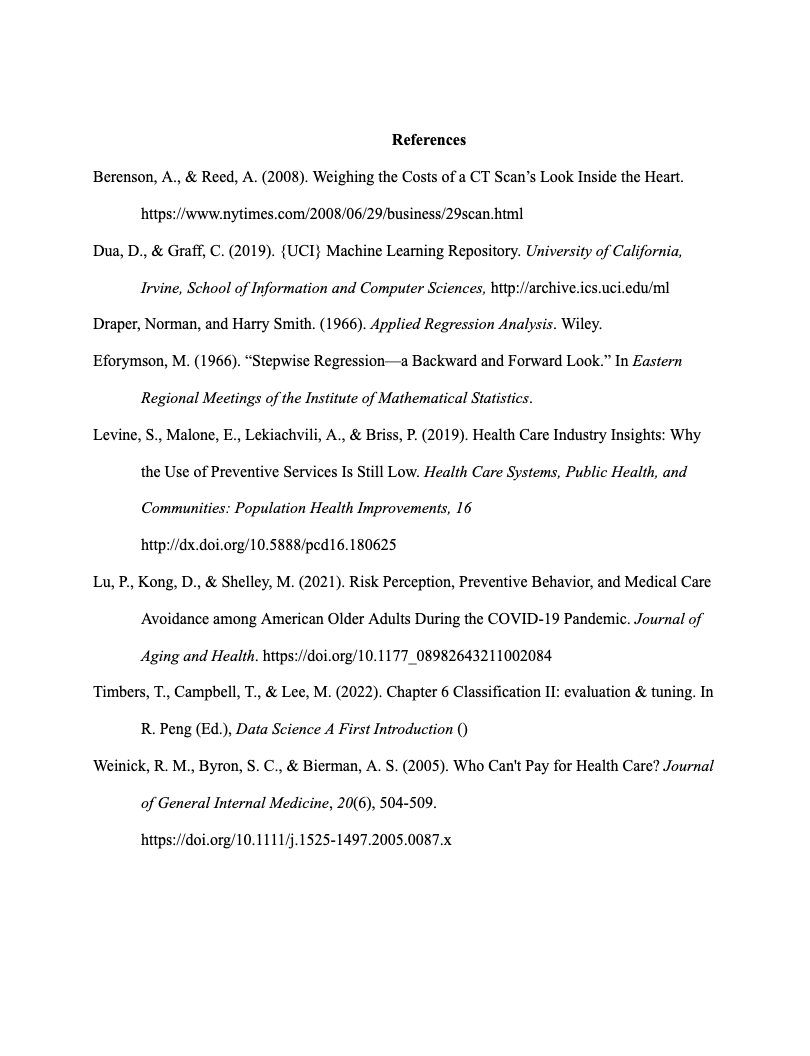